In [1]:
import os 
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', ))
sys.path.append(repo_root)

from src import *
from tst.tst_weight_conversion.old_newman import *

In [2]:


def bin_leadership(N,M,K1,K2):
    results_prop = []
    results_mean = []
    results_sum = []
    for rep in range(50):
        data, pi_values = generate_leadership_model_instance(N,M,K1,K2)

        training_set, testing_set = train_test_split(data, train_size=.8, random_state=None)

        # stdl = compute_predicted_ratings_std_leadership_old(training_set, pi_values)
        # hol = compute_predicted_ratings_hol_old(training_set, pi_values)


        weighted_train = convert_games_to_dict(training_set)
        
        stdl = compute_predicted_ratings_std_leadership(weighted_train, pi_values)
        hol = compute_predicted_ratings_hol(weighted_train, pi_values)

        std_likelihood = np.array(compute_leadership_likelihood(stdl, testing_set))
        hol_likelihood = np.array(compute_leadership_likelihood(hol, testing_set))

        results_sum.append(np.sum(np.sum(hol_likelihood) - np.sum(std_likelihood)))

        prop = sum(std_likelihood > hol_likelihood)/ len(testing_set)

        results_prop.append(prop)
        results_mean.append(np.average(hol_likelihood-std_likelihood))

    return results_prop, results_mean, results_sum








In [3]:
prop, mean, sum_ = bin_leadership(100, 500, 4, 4)
print(len([ x for x in mean if x > 0])/ len(mean))

0.76


0.76


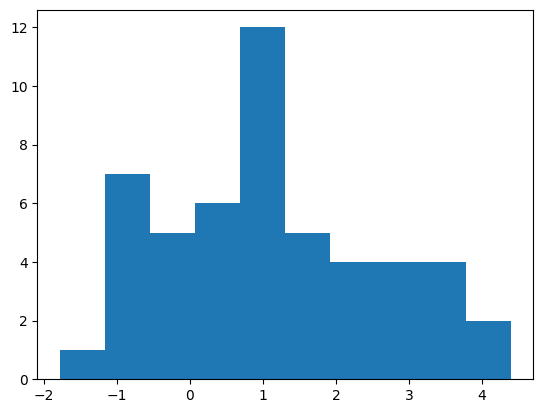

In [5]:
plt.hist(sum_)
print(len([ x for x in sum_ if x > 0])/ len(sum_))

In [69]:
N = 100
M_values = np.logspace(1, 18, num=10, endpoint=True, base=2.0)

results_m = {}
for m in M_values:
    m = int(m)
    prop, mean = bin_leadership(N, m, 4, 4)
    results_m[m] = np.mean(prop)

    


KeyboardInterrupt: 

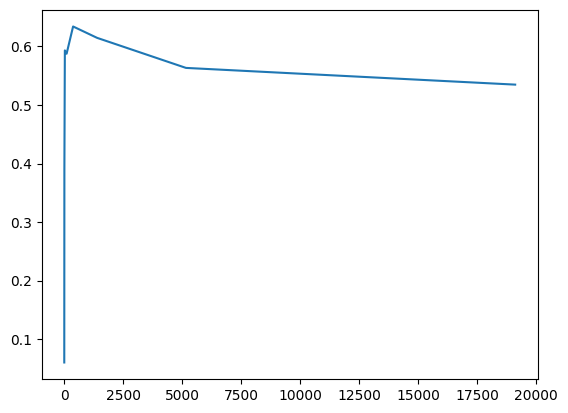

In [70]:
plt.plot(results_m.keys(), results_m.values())

In [75]:
N = 100
K_values = range(2,12)

results_k = {}
for k in K_values:
    prop, mean = bin_leadership(100, 1000, k, k)
    results_k[k] = np.mean(prop)

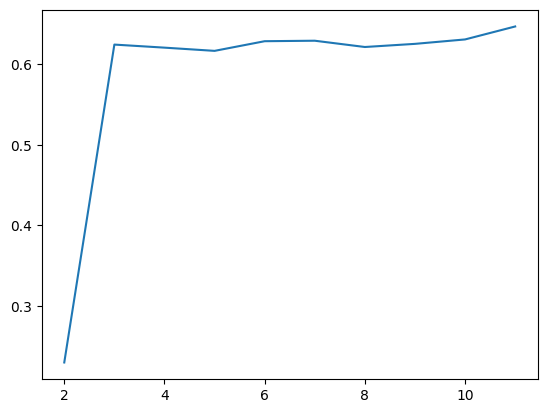

In [76]:
plt.plot(results_k.keys(), results_k.values())